Robust MPC: Simulation with linearized rocket system

In [10]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
K: [[-9.82670419 -6.76919539]]
Maximum invariant set successfully computed after 31 iterations for Z MPC.
X_tilde vertices:
[[ 0.  1.]
 [ 0. 19.]]
U_tilde vertices:
[[46.25475859]
 [61.2357243 ]]
U_tilde has 2 constraints
Maximum invariant set successfully computed after 32 iterations for Z MPC.
Terminal set Xf_tilde computed with 34 constraints


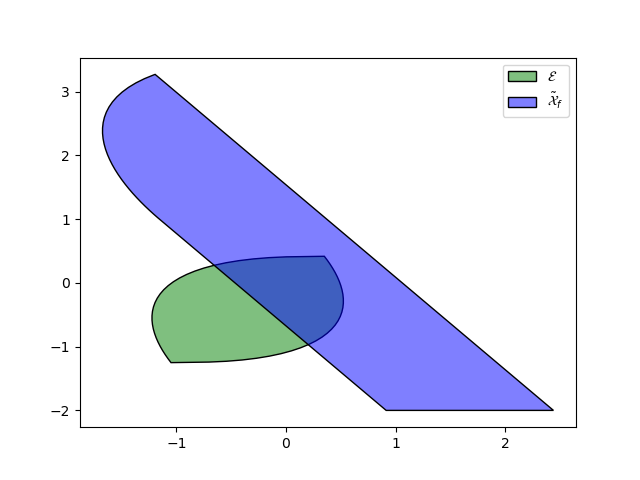

In [11]:
from LandMPC.MPCControl_z import MPCControl_z
from src.rocket import Rocket
from src.pos_rocket_vis import *

# Require ipympl
%matplotlib widget 

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

sim_time = 20  # simulation length in seconds
x0 = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(30), #gamma [rad] roll-MPC
               0, #vx [m/s] x-MPC
               0, #vy [m/s] y-MPC
               0, #vz [m/s] z-MPC
               3, #x [m]
               2, #y [m]
               10  #z [m]
               ])  # initial state   
x_ref = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(0), #gamma [rad] roll-MPC
               0, #vx [m/s] x-MPC
               0, #vy [m/s] y-MPC
               0, #vz [m/s] z-MPC
               1, #x [m]
               0, #y [m]
               3  #z [m]
               ])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
sys = rocket.linearize_sys(xs, us)
A, B = sys.A, sys.B


H = 5
mpc = MPCControl_z(A, B, xs, us, Ts, H)

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

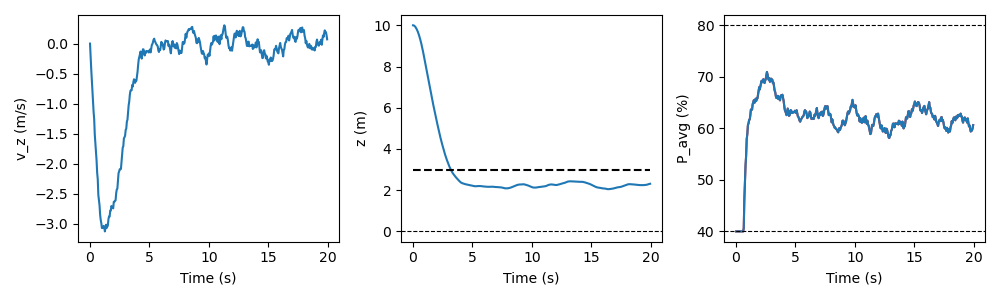

In [12]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='random')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

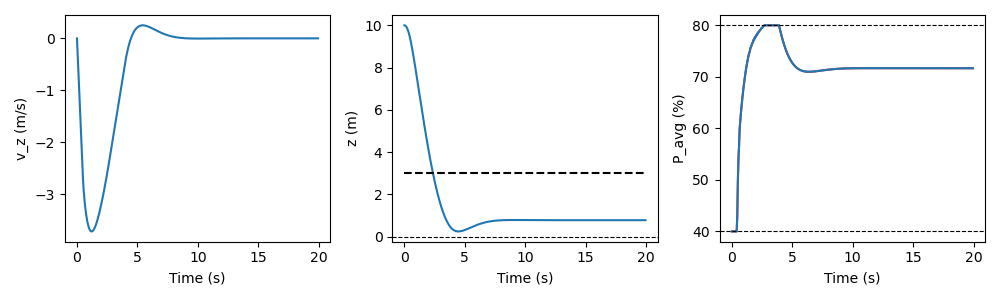

In [4]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='extreme')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')